In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Normalize & reshape
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

In [5]:
# Data augmentation
augmentor = ImageDataGenerator(
    rotation_range=12,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.1,
    zoom_range=0.15
)
augmentor.fit(train_images)


In [6]:
# CNN model
cnn = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])


In [7]:
# Train model
history = cnn.fit(
    augmentor.flow(train_images, train_labels, batch_size=128),
    epochs=12,
    validation_data=(test_images, test_labels)
)

Epoch 1/12


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 147s 309ms/step - accuracy: 0.6190 - loss: 1.1048 - val_accuracy: 0.9804 - val_loss: 0.0649
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 301ms/step - accuracy: 0.9252 - loss: 0.2510 - val_accuracy: 0.9859 - val_loss: 0.0459
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 309ms/step - accuracy: 0.9444 - loss: 0.1826 - val_accuracy: 0.9884 - val_loss: 0.0373
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 307ms/step - accuracy: 0.9548 - loss: 0.1457 - val_accuracy: 0.9912 - val_loss: 0.0272
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 299ms/step - accuracy: 0.9606 - loss: 0.1322 - val_accuracy: 0.9918 - val_loss: 0.0261
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 138s 294ms/step - accuracy: 0.9674 - loss: 0.1117 - val_accuracy: 0.9929 - val_loss: 0.0222
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 308ms/step - accuracy: 0.9679 - loss: 0.1052 - val_accuracy: 0.9915 - val_loss: 0.0229
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 298ms/step - accuracy: 0.9721 - loss: 0.09

In [8]:
# Save model
cnn.save("mnist_cnn_v2.h5")
print("✅ Model saved as mnist_cnn_v2.h5")

✅ Model saved as mnist_cnn_v2.h5


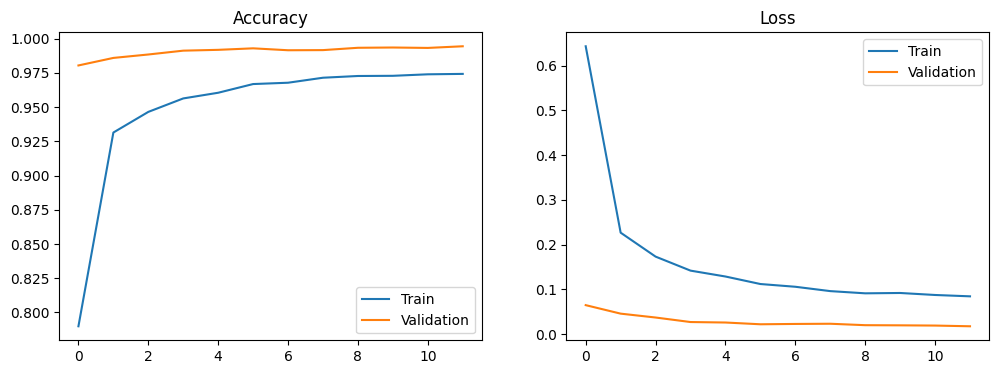

In [9]:
# Plot training history
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(history.history['accuracy'], label="Train")
ax[0].plot(history.history['val_accuracy'], label="Validation")
ax[0].set_title("Accuracy"); ax[0].legend()
ax[1].plot(history.history['loss'], label="Train")
ax[1].plot(history.history['val_loss'], label="Validation")
ax[1].set_title("Loss"); ax[1].legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


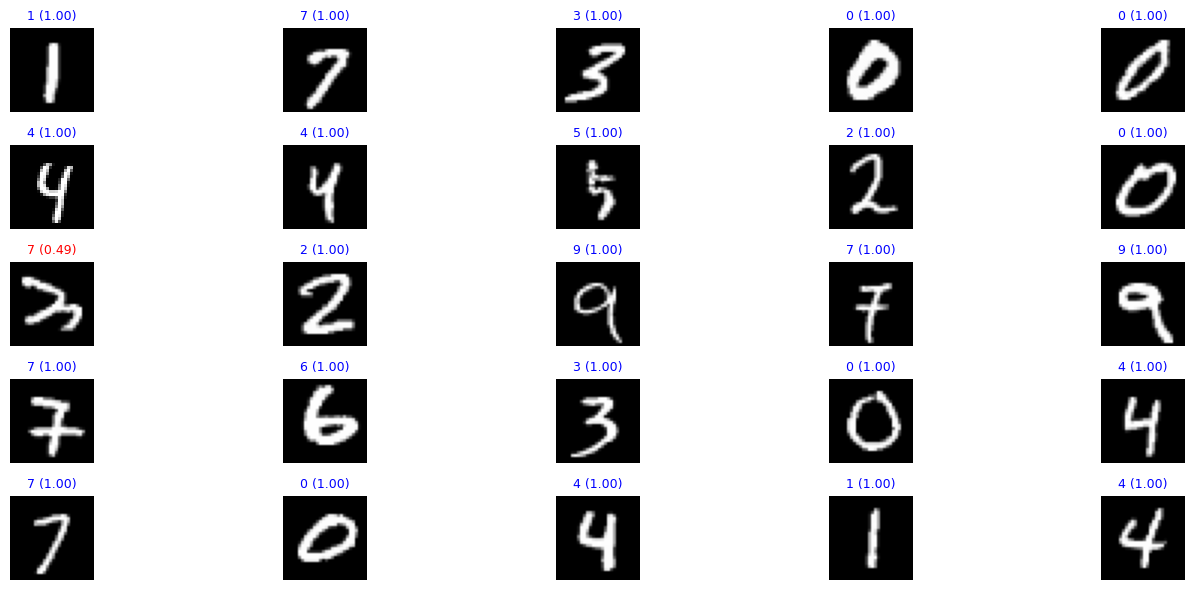

In [10]:
# Visualize predictions
def visualize_predictions(model, images, labels, n=25):
    idxs = np.random.choice(len(images), n, replace=False)
    preds = model.predict(images[idxs])
    plt.figure(figsize=(15,6))
    for i, idx in enumerate(idxs):
        plt.subplot(5, n//5, i+1)
        plt.imshow(images[idx].reshape(28,28), cmap="gray")
        pred = np.argmax(preds[i])
        conf = preds[i][pred]
        color = "blue" if pred == labels[idx] else "red"
        plt.title(f"{pred} ({conf:.2f})", color=color, fontsize=9)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

visualize_predictions(cnn, test_images, test_labels, n=25)

In [11]:
# Test single image
def check_sample(idx):
    img = test_images[idx].reshape(1,28,28,1)
    prob = cnn.predict(img)
    pred = np.argmax(prob)
    conf = prob[0][pred]
    plt.imshow(test_images[idx].reshape(28,28), cmap="gray_r")
    plt.axis("off")
    plt.title(f"True: {test_labels[idx]} | Pred: {pred} ({conf:.2f})",
              color=("blue" if pred==test_labels[idx] else "red"))
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


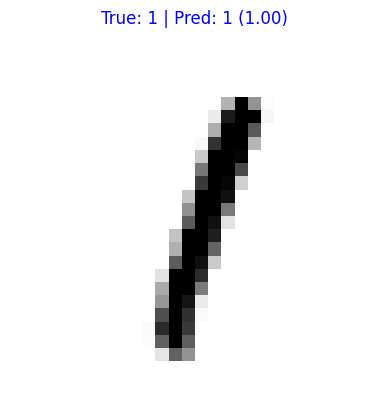

In [12]:
check_sample(5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


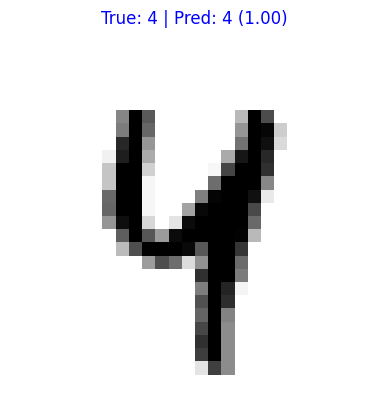

In [13]:
check_sample(42)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


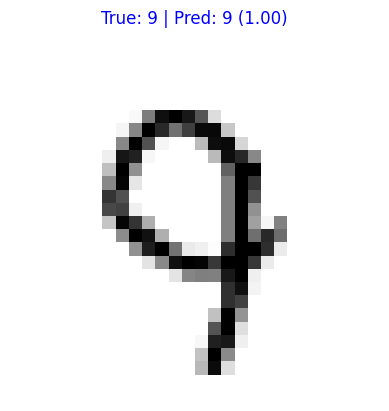

In [14]:
check_sample(999)